In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
file_path = 'car.data'

column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]          

df = pd.read_csv(file_path, header=None, names=column_names)

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:

from sklearn.preprocessing import StandardScaler,LabelEncoder
label=LabelEncoder()
for col in df.columns:
    df[col]=label.fit_transform(df[col])

In [6]:
df['class'].value_counts()

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
data_minmax = scaler.fit_transform(df.drop('class', axis=1))  
df_minmax = pd.DataFrame(data_minmax, columns=df.columns[:-1])  
X=df_minmax
y=df['class']
df_minmax

,buying,maint,doors,persons,lug_boot,safety
0,1.000000,1.000000,0.0,0.0,1.0,0.5
1,1.000000,1.000000,0.0,0.0,1.0,1.0
2,1.000000,1.000000,0.0,0.0,1.0,0.0
3,1.000000,1.000000,0.0,0.0,0.5,0.5
4,1.000000,1.000000,0.0,0.0,0.5,1.0
...,...,...,...,...,...,...
1723,0.333333,0.333333,1.0,1.0,0.5,1.0
1724,0.333333,0.333333,1.0,1.0,0.5,0.0
1725,0.333333,0.333333,1.0,1.0,0.0,0.5
1726,0.333333,0.333333,1.0,1.0,0.0,1.0


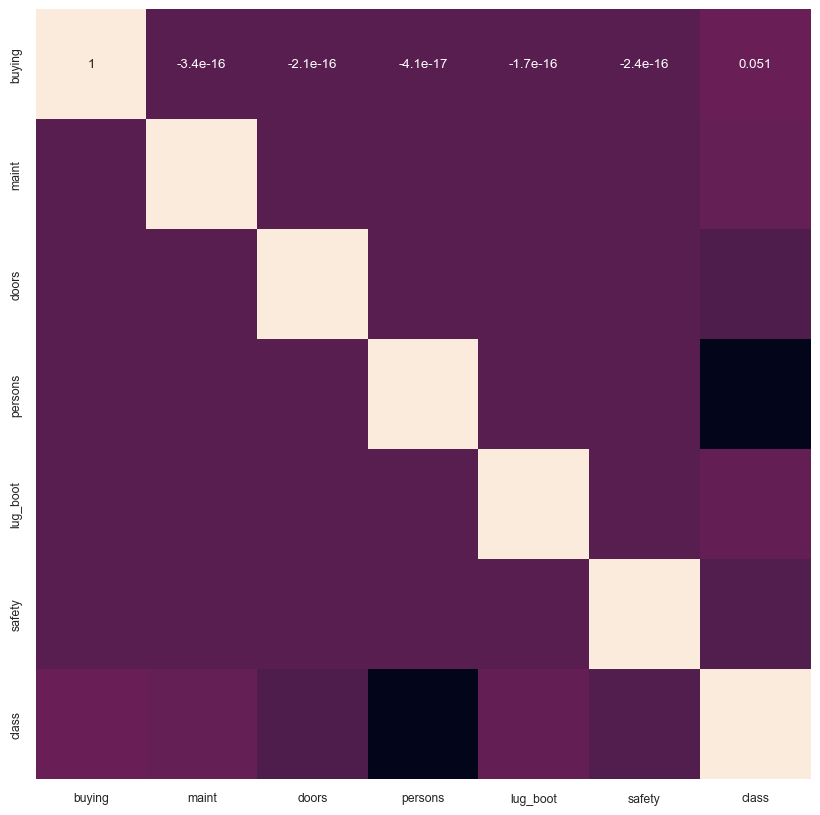

In [9]:
df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- KNN Classifier ---
0.8121387283236994
[[ 64   4   8   2]
 [ 10   0   0   0]
 [ 31   0 209   0]
 [ 10   0   0   8]]


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.976878612716763
[[ 76   0   2   0]
 [  4   6   0   0]
 [  1   1 238   0]
 [  0   0   0  18]]


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6676300578034682
[[ 13   0  64   1]
 [  2   0   8   0]
 [ 22   0 218   0]
 [  5   0  13   0]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9855491329479769
[[ 78   0   0   0]
 [  3   7   0   0]
 [  2   0 238   0]
 [  0   0   0  18]]


In [18]:
Y = pd.get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import numpy as np

model = Sequential()

model.add(Dense(108,input_shape=(6,),activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 108)               756       
                                                                 
 dense_1 (Dense)             (None, 36)                3924      
                                                                 
 dense_2 (Dense)             (None, 12)                444       
                                                                 
 dense_3 (Dense)             (None, 4)                 52        
                                                                 
Total params: 5176 (20.22 KB)
Trainable params: 5176 (20.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=64,validation_split= 0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 [==============================] - 1s 8ms/step - loss: 1.2355 - accuracy: 0.6259 - val_loss: 1.0352 - val_accuracy: 0.7122
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.9302 - accuracy: 0.7039 - val_loss: 0.8317 - val_accuracy: 0.7122
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8214 - accuracy: 0.7039 - val_loss: 0.7743 - val_accuracy: 0.7122
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7686 - accuracy: 0.7039 - val_loss: 0.7256 - val_accuracy: 0.7122
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7256 - accuracy: 0.7144 - val_loss: 0.6950 - val_accuracy: 0.7266
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.7192 - val_loss: 0.6737 - val_accuracy: 0.7410
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.7216 - val_loss: 0.6537 - val_accuracy: 0.7554
Epoch 8/30
20/20 [==

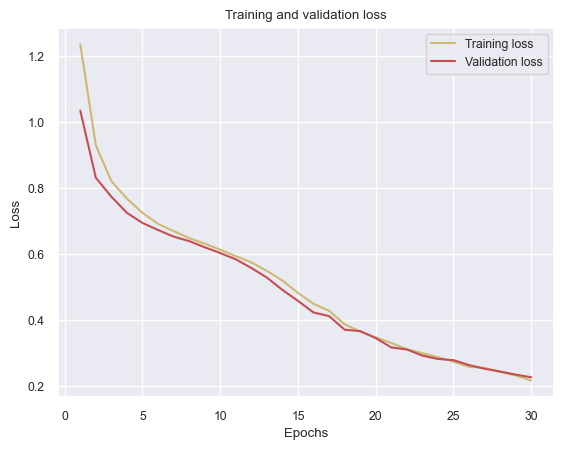

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.90      0.81        86
           1       0.00      0.00      0.00        12
           2       0.96      0.97      0.97       236
           3       1.00      0.42      0.59        12

    accuracy                           0.90       346
   macro avg       0.68      0.57      0.59       346
weighted avg       0.88      0.90      0.88       346

[[ 77   0   9   0]
 [ 12   0   0   0]
 [  7   0 229   0]
 [  7   0   0   5]]
